In [1]:
import cv2
import numpy as np
from POS_WANG import POS_WANG
from POS_WANG_MASK import POS_WANG_MASK
from HR_from_bvp import HR_from_bvp
from HR_from_csv import HR_from_csv

In [3]:
base_path_video = "Dataset/Patient_1/Q1_1/"

# Cargar video y convertir a RGB
video_path = base_path_video + "vid_crop.avi"
cap = cv2.VideoCapture(video_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    #frame = cv2.resize(frame, (128, 128))  # resize opcional
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
cap.release()

fs = 60  # fps del video

t_start = 2
t_end = 12

#frames = np.array(frames[t_start*fs:t_end*fs])
frames = np.array(frames)

print(f"Loaded {len(frames)} frames from video.")

# Inferir señal rPPG

#rppg_signal = POS_WANG(frames, fs)
try:
    rppg_signal = POS_WANG_MASK(frames, fs)
    #np.save("pos_output.npy", rppg_signal)
    print("Success")
except Exception as e:
    print("Error during POS_WANG_MASK:", e)

Loaded 1372 frames from video.
Success


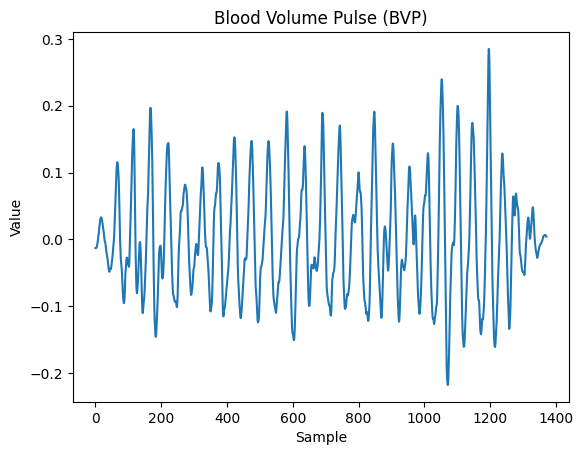

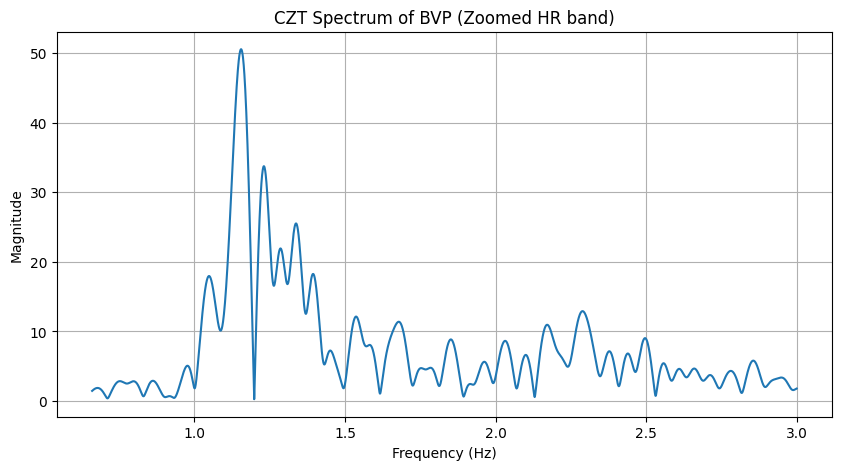

HR estimated by CZT: 69.29142857142857 bpm


In [4]:
hr = HR_from_bvp(rppg_signal)

print("HR estimated by CZT:", hr, "bpm")

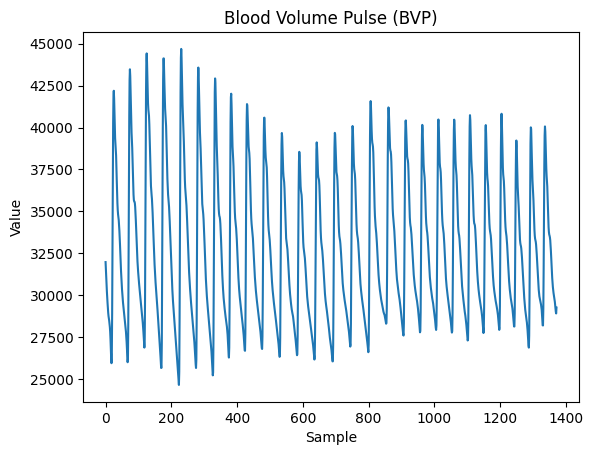

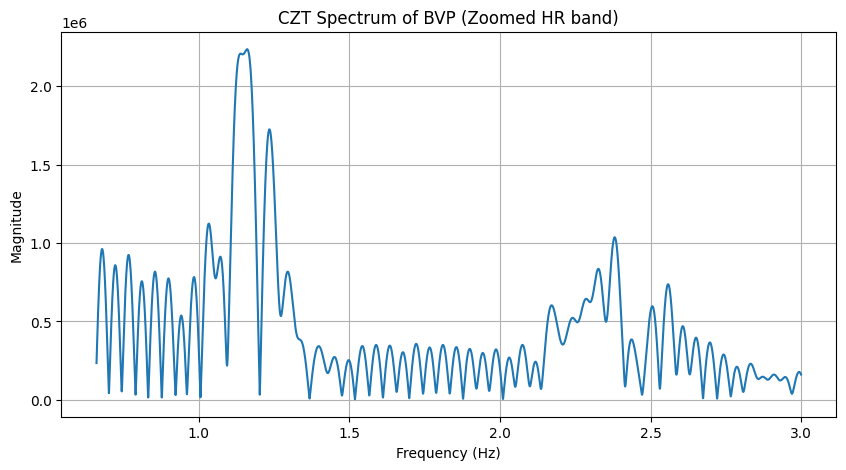

HR estimated by CZT: 69.6 bpm


In [5]:
hr_true = HR_from_csv(base_path_video + "bio.csv")
print("HR estimated by CZT:", hr_true, "bpm")